In [1]:
import pandas as pd
df = pd.read_csv('MVC_250418.csv')

/var/folders/m8/6zt09fhx313d5dk_d202076m0000gn/T/ipykernel_60722/1431456960.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MVC_250418.csv')


In [2]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169502,04/14/2025,17:58,NaN,NaN,40.740600,-73.879320,"(40.7406, -73.87932)",BROADWAY,DONGAN AVE,NaN,...,Unspecified,NaN,NaN,NaN,4806008,Sedan,Bike,NaN,NaN,NaN
2169503,04/12/2025,16:10,BROOKLYN,11217.0,40.687040,-73.985530,"(40.68704, -73.98553)",NaN,NaN,388 ATLANTIC AVE,...,Unspecified,Unspecified,NaN,NaN,4806051,Moped,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN
2169504,04/12/2025,0:08,STATEN ISLAND,10306.0,40.562298,-74.106170,"(40.562298, -74.10617)",MILTON AVE,EBBITTS ST,NaN,...,Unspecified,NaN,NaN,NaN,4806072,Sedan,Sedan,NaN,NaN,NaN
2169505,04/14/2025,10:45,QUEENS,11435.0,40.686478,-73.800780,"(40.686478, -73.80078)",144 ST,111 AVE,NaN,...,NaN,NaN,NaN,NaN,4805968,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [3]:
df.shape

(2169507, 29)

In [4]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           670364
ZIP CODE                          670633
LATITUDE                          239853
LONGITUDE                         239853
LOCATION                          239853
ON STREET NAME                    467804
CROSS STREET NAME                 827755
OFF STREET NAME                  1794077
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       7488
CONTRIBUTING FACTOR VEHICLE 2     344552
CONTRIBUTING FACTOR VEHICLE 3    2012948
CONTRIBUTING FACTOR VEHICLE 4    2133820
CONTRIBUTING FACTOR VEHICLE 5    2159750
COLLISION_ID                           0
VEHICLE TYPE COD

# Assign missing Boroughs using Nearest 

In [5]:
missing_boroughs = df[df['BOROUGH'].isnull()]

missing_with_location = missing_boroughs[
    missing_boroughs['LATITUDE'].notnull() & missing_boroughs['LONGITUDE'].notnull() #missing val with x and y cooridinate available
]

print(f"Number of rows with missing Borough but filled Latitude/Longitude: {len(missing_with_location)}")


Number of rows with missing Borough but filled Latitude/Longitude: 468103


In [6]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [7]:
known = df[df['BOROUGH'].notnull() & df['LATITUDE'].notnull() & df['LONGITUDE'].notnull()]
print(known['BOROUGH'].isnull().sum()) #should be 0

unknown = df[df['BOROUGH'].isnull() & df['LATITUDE'].notnull() & df['LONGITUDE'].notnull()]
print(unknown['BOROUGH'].isnull().sum()) #should be 468103

0
468103


In [8]:
nn_model = NearestNeighbors(n_neighbors=1)
nn_model.fit(known[['LATITUDE', 'LONGITUDE']])
distances, indices = nn_model.kneighbors(unknown[['LATITUDE', 'LONGITUDE']])
nearest_boroughs = known.iloc[indices.flatten()]['BOROUGH'].values
df.loc[unknown.index, 'BOROUGH'] = nearest_boroughs

In [9]:
print(df['BOROUGH'].isnull().sum()) #Should be 670364 - 468103

202261


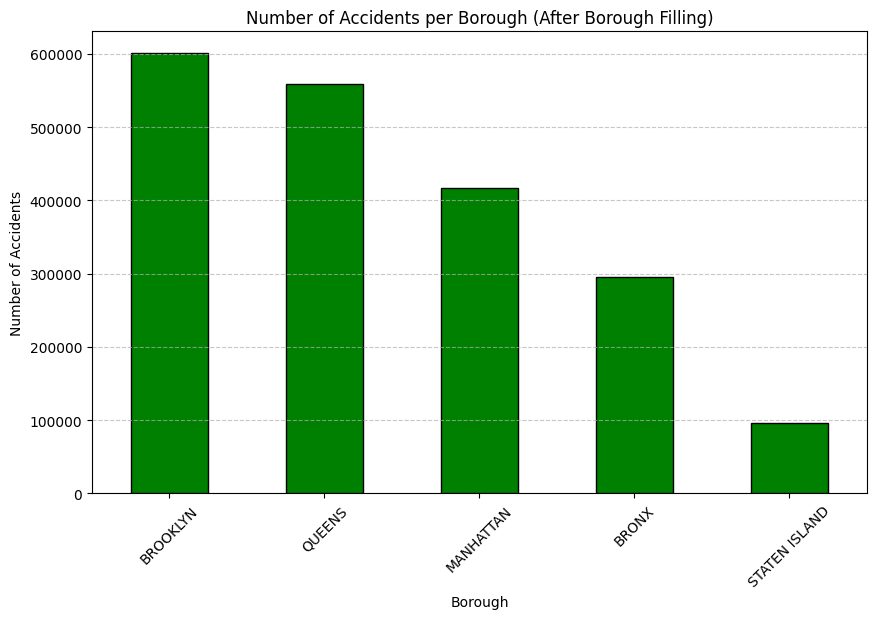

In [10]:
import matplotlib.pyplot as plt

borough_counts = df['BOROUGH'].value_counts()

plt.figure(figsize=(10,6))
borough_counts.plot(kind='bar', edgecolor='black', color = 'green')

plt.title('Number of Accidents per Borough (After Borough Filling)')
plt.xlabel('Borough')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [11]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169502,04/14/2025,17:58,QUEENS,NaN,40.740600,-73.879320,"(40.7406, -73.87932)",BROADWAY,DONGAN AVE,NaN,...,Unspecified,NaN,NaN,NaN,4806008,Sedan,Bike,NaN,NaN,NaN
2169503,04/12/2025,16:10,BROOKLYN,11217.0,40.687040,-73.985530,"(40.68704, -73.98553)",NaN,NaN,388 ATLANTIC AVE,...,Unspecified,Unspecified,NaN,NaN,4806051,Moped,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN
2169504,04/12/2025,0:08,STATEN ISLAND,10306.0,40.562298,-74.106170,"(40.562298, -74.10617)",MILTON AVE,EBBITTS ST,NaN,...,Unspecified,NaN,NaN,NaN,4806072,Sedan,Sedan,NaN,NaN,NaN
2169505,04/14/2025,10:45,QUEENS,11435.0,40.686478,-73.800780,"(40.686478, -73.80078)",144 ST,111 AVE,NaN,...,NaN,NaN,NaN,NaN,4805968,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


# Clean missing vehicle type values to None

In [12]:
vehicle_cols = [
    'VEHICLE TYPE CODE 1',
    'VEHICLE TYPE CODE 2',
    'VEHICLE TYPE CODE 3',
    'VEHICLE TYPE CODE 4',
    'VEHICLE TYPE CODE 5'
]

df[vehicle_cols] = df[vehicle_cols].fillna('None')


In [13]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,None,None,None
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,None,None,None,None
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,None,None
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,None,None,None
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169502,04/14/2025,17:58,QUEENS,NaN,40.740600,-73.879320,"(40.7406, -73.87932)",BROADWAY,DONGAN AVE,NaN,...,Unspecified,NaN,NaN,NaN,4806008,Sedan,Bike,None,None,None
2169503,04/12/2025,16:10,BROOKLYN,11217.0,40.687040,-73.985530,"(40.68704, -73.98553)",NaN,NaN,388 ATLANTIC AVE,...,Unspecified,Unspecified,NaN,NaN,4806051,Moped,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,None,None
2169504,04/12/2025,0:08,STATEN ISLAND,10306.0,40.562298,-74.106170,"(40.562298, -74.10617)",MILTON AVE,EBBITTS ST,NaN,...,Unspecified,NaN,NaN,NaN,4806072,Sedan,Sedan,None,None,None
2169505,04/14/2025,10:45,QUEENS,11435.0,40.686478,-73.800780,"(40.686478, -73.80078)",144 ST,111 AVE,NaN,...,NaN,NaN,NaN,NaN,4805968,Station Wagon/Sport Utility Vehicle,None,None,None,None


# Clean missing contributing factor type values to None

In [14]:
factor_cols = [
    'CONTRIBUTING FACTOR VEHICLE 1',
    'CONTRIBUTING FACTOR VEHICLE 2',
    'CONTRIBUTING FACTOR VEHICLE 3',
    'CONTRIBUTING FACTOR VEHICLE 4',
    'CONTRIBUTING FACTOR VEHICLE 5'
]

df[factor_cols] = df[factor_cols].fillna('None')

In [15]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,None,None,None,4455765,Sedan,Sedan,None,None,None
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,None,None,None,None,4513547,Sedan,None,None,None,None
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,None,None,4675373,Moped,Sedan,Sedan,None,None
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,None,None,None,4541903,Sedan,Pick-up Truck,None,None,None
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,None,None,None,4566131,Station Wagon/Sport Utility Vehicle,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169502,04/14/2025,17:58,QUEENS,NaN,40.740600,-73.879320,"(40.7406, -73.87932)",BROADWAY,DONGAN AVE,NaN,...,Unspecified,None,None,None,4806008,Sedan,Bike,None,None,None
2169503,04/12/2025,16:10,BROOKLYN,11217.0,40.687040,-73.985530,"(40.68704, -73.98553)",NaN,NaN,388 ATLANTIC AVE,...,Unspecified,Unspecified,None,None,4806051,Moped,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,None,None
2169504,04/12/2025,0:08,STATEN ISLAND,10306.0,40.562298,-74.106170,"(40.562298, -74.10617)",MILTON AVE,EBBITTS ST,NaN,...,Unspecified,None,None,None,4806072,Sedan,Sedan,None,None,None
2169505,04/14/2025,10:45,QUEENS,11435.0,40.686478,-73.800780,"(40.686478, -73.80078)",144 ST,111 AVE,NaN,...,None,None,None,None,4805968,Station Wagon/Sport Utility Vehicle,None,None,None,None


# Fill in Zip Code given Location

In [16]:
missing_zipcodes = df[df['ZIP CODE'].isnull()]
missing_zipcodes.shape

missing_zipcodes_with_location = missing_zipcodes[
    missing_zipcodes['LATITUDE'].notnull() & missing_zipcodes['LONGITUDE'].notnull() # missing ZIP but x and y coordinates available
]

print(f"Number of rows with missing ZIP CODE but filled Latitude/Longitude: {len(missing_zipcodes_with_location)}")


Number of rows with missing ZIP CODE but filled Latitude/Longitude: 468346


In [17]:
known_zip = df[
    df['ZIP CODE'].notnull() & 
    df['LATITUDE'].notnull() & 
    df['LONGITUDE'].notnull()
]

print(known_zip['ZIP CODE'].isnull().sum()) # should be 0 

unknown_zip = df[
    df['ZIP CODE'].isnull() & 
    df['LATITUDE'].notnull() & 
    df['LONGITUDE'].notnull()
]

print(unknown_zip['ZIP CODE'].isnull().sum()) # should be 468346


0
468346


In [18]:
nn_zip_model = NearestNeighbors(n_neighbors=1)
nn_zip_model.fit(known_zip[['LATITUDE', 'LONGITUDE']])
zip_distances, zip_indices = nn_zip_model.kneighbors(unknown_zip[['LATITUDE', 'LONGITUDE']])
nearest_zipcodes = known_zip.iloc[zip_indices.flatten()]['ZIP CODE'].values
df.loc[unknown_zip.index, 'ZIP CODE'] = nearest_zipcodes

In [19]:
print(df['ZIP CODE'].isnull().sum()) #should be 670633 - 468346

202287


In [20]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,None,None,None,4455765,Sedan,Sedan,None,None,None
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,None,None,None,None,4513547,Sedan,None,None,None,None
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,None,None,4675373,Moped,Sedan,Sedan,None,None
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,None,None,None,4541903,Sedan,Pick-up Truck,None,None,None
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,None,None,None,4566131,Station Wagon/Sport Utility Vehicle,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169502,04/14/2025,17:58,QUEENS,11373.0,40.740600,-73.879320,"(40.7406, -73.87932)",BROADWAY,DONGAN AVE,NaN,...,Unspecified,None,None,None,4806008,Sedan,Bike,None,None,None
2169503,04/12/2025,16:10,BROOKLYN,11217.0,40.687040,-73.985530,"(40.68704, -73.98553)",NaN,NaN,388 ATLANTIC AVE,...,Unspecified,Unspecified,None,None,4806051,Moped,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,None,None
2169504,04/12/2025,0:08,STATEN ISLAND,10306.0,40.562298,-74.106170,"(40.562298, -74.10617)",MILTON AVE,EBBITTS ST,NaN,...,Unspecified,None,None,None,4806072,Sedan,Sedan,None,None,None
2169505,04/14/2025,10:45,QUEENS,11435.0,40.686478,-73.800780,"(40.686478, -73.80078)",144 ST,111 AVE,NaN,...,None,None,None,None,4805968,Station Wagon/Sport Utility Vehicle,None,None,None,None


# Fill missing 'ON STREET NAME' using Nearest Neighbors with Locaiton Coordinates

In [21]:
missing_streetnames = df[df['ON STREET NAME'].isnull()]
print(missing_streetnames.shape)

missing_streetnames_with_location = missing_streetnames[
    missing_streetnames['LATITUDE'].notnull() & missing_streetnames['LONGITUDE'].notnull() # missing street name but x and y available
]
print(f"Number of rows with missing ON STREET NAME but filled Latitude/Longitude: {len(missing_streetnames_with_location)}")

(467804, 29)
Number of rows with missing ON STREET NAME but filled Latitude/Longitude: 411211


In [22]:
known_streetnames = df[
    df['ON STREET NAME'].notnull() & 
    df['LATITUDE'].notnull() & 
    df['LONGITUDE'].notnull()
]
print(known_streetnames['ON STREET NAME'].isnull().sum())  # should be 0

unknown_streetnames = df[
    df['ON STREET NAME'].isnull() &
    df['LATITUDE'].notnull() &
    df['LONGITUDE'].notnull()
]
print(unknown_streetnames['ON STREET NAME'].isnull().sum())  # should be 411211


0
411211


In [23]:
nn_street_model = NearestNeighbors(n_neighbors=1)
nn_street_model.fit(known_streetnames[['LATITUDE', 'LONGITUDE']])
street_distances, street_indices = nn_street_model.kneighbors(unknown_streetnames[['LATITUDE', 'LONGITUDE']])
nearest_streets = known_streetnames.iloc[street_indices.flatten()]['ON STREET NAME'].values
df.loc[unknown_streetnames.index, 'ON STREET NAME'] = nearest_streets

In [24]:
print(df['ON STREET NAME'].isnull().sum())

56593


In [25]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,None,None,None,4455765,Sedan,Sedan,None,None,None
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,None,None,None,None,4513547,Sedan,None,None,None,None
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,None,None,4675373,Moped,Sedan,Sedan,None,None
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,None,None,None,4541903,Sedan,Pick-up Truck,None,None,None
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,None,None,None,4566131,Station Wagon/Sport Utility Vehicle,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169502,04/14/2025,17:58,QUEENS,11373.0,40.740600,-73.879320,"(40.7406, -73.87932)",BROADWAY,DONGAN AVE,NaN,...,Unspecified,None,None,None,4806008,Sedan,Bike,None,None,None
2169503,04/12/2025,16:10,BROOKLYN,11217.0,40.687040,-73.985530,"(40.68704, -73.98553)",ATLANTIC AVENUE,NaN,388 ATLANTIC AVE,...,Unspecified,Unspecified,None,None,4806051,Moped,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,None,None
2169504,04/12/2025,0:08,STATEN ISLAND,10306.0,40.562298,-74.106170,"(40.562298, -74.10617)",MILTON AVE,EBBITTS ST,NaN,...,Unspecified,None,None,None,4806072,Sedan,Sedan,None,None,None
2169505,04/14/2025,10:45,QUEENS,11435.0,40.686478,-73.800780,"(40.686478, -73.80078)",144 ST,111 AVE,NaN,...,None,None,None,None,4805968,Station Wagon/Sport Utility Vehicle,None,None,None,None


# Fill missing LATITUDE and LONGITUDE using ON STREET NAME with means

In [26]:
# 1. Compute the mean lat/lon for each street (only from rows where both are present)
street_means = (
    df
    .dropna(subset=['ON STREET NAME', 'LATITUDE', 'LONGITUDE'])
    .groupby('ON STREET NAME')[['LATITUDE','LONGITUDE']]
    .mean()
)

# 2. For rows with a known street name, fill missing LATITUDE from that street's mean
mask = df['ON STREET NAME'].notnull()

df.loc[mask, 'LATITUDE'] = df.loc[mask, 'LATITUDE'].fillna(
    df.loc[mask, 'ON STREET NAME'].map(street_means['LATITUDE'])
)

# 3. Similarly fill missing LONGITUDE
df.loc[mask, 'LONGITUDE'] = df.loc[mask, 'LONGITUDE'].fillna(
    df.loc[mask, 'ON STREET NAME'].map(street_means['LONGITUDE'])
)

# 4. Verify
print("Still missing LATITUDE:", df['LATITUDE'].isnull().sum())
print("Still missing LONGITUDE:", df['LONGITUDE'].isnull().sum())


Still missing LATITUDE: 66805
Still missing LONGITUDE: 66805


In [27]:
df['ON STREET NAME'].isnull().sum()

np.int64(56593)

# Fill in Location column with new  Longitude and Latitude

In [28]:
mask_missing_location = (
    df['LATITUDE'].notnull() &
    df['LONGITUDE'].notnull() &
    df['LOCATION'].isnull()
)

df.loc[mask_missing_location, 'LOCATION'] = df.loc[mask_missing_location].apply(
    lambda row: f"({row['LATITUDE']}, {row['LONGITUDE']})",
    axis=1
)


In [29]:
print(df["LOCATION"].isnull().sum())

66805


In [30]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,40.616843,-73.535899,"(40.616843008090186, -73.53589886127321)",WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,None,None,None,4455765,Sedan,Sedan,None,None,None
1,03/26/2022,11:45,NaN,NaN,40.750223,-73.955238,"(40.7502231, -73.9552383)",QUEENSBORO BRIDGE UPPER,NaN,NaN,...,None,None,None,None,4513547,Sedan,None,None,None,None
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,None,None,4675373,Moped,Sedan,Sedan,None,None
3,06/29/2022,6:55,NaN,NaN,40.804719,-73.802811,"(40.80471912608696, -73.80281051304348)",THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,None,None,None,4541903,Sedan,Pick-up Truck,None,None,None
4,09/21/2022,13:21,NaN,NaN,40.703752,-73.993770,"(40.70375224166667, -73.99376973333334)",BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,None,None,None,4566131,Station Wagon/Sport Utility Vehicle,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169502,04/14/2025,17:58,QUEENS,11373.0,40.740600,-73.879320,"(40.7406, -73.87932)",BROADWAY,DONGAN AVE,NaN,...,Unspecified,None,None,None,4806008,Sedan,Bike,None,None,None
2169503,04/12/2025,16:10,BROOKLYN,11217.0,40.687040,-73.985530,"(40.68704, -73.98553)",ATLANTIC AVENUE,NaN,388 ATLANTIC AVE,...,Unspecified,Unspecified,None,None,4806051,Moped,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,None,None
2169504,04/12/2025,0:08,STATEN ISLAND,10306.0,40.562298,-74.106170,"(40.562298, -74.10617)",MILTON AVE,EBBITTS ST,NaN,...,Unspecified,None,None,None,4806072,Sedan,Sedan,None,None,None
2169505,04/14/2025,10:45,QUEENS,11435.0,40.686478,-73.800780,"(40.686478, -73.80078)",144 ST,111 AVE,NaN,...,None,None,None,None,4805968,Station Wagon/Sport Utility Vehicle,None,None,None,None


# Fill Missing ZIP CODE Using Nearest Neighbors (again)

In [31]:
missing_zipcodes = df[df['ZIP CODE'].isnull()]
print(missing_zipcodes.shape)  # See how many missing ZIP CODEs

missing_zipcodes_with_location = missing_zipcodes[
    missing_zipcodes['LATITUDE'].notnull() & missing_zipcodes['LONGITUDE'].notnull()
]
print(f"Number of rows with missing ZIP CODE but filled Latitude/Longitude: {len(missing_zipcodes_with_location)}")

known_zipcodes = df[
    df['ZIP CODE'].notnull() & 
    df['LATITUDE'].notnull() & 
    df['LONGITUDE'].notnull()
]
print(known_zipcodes['ZIP CODE'].isnull().sum())  # Should be 0

unknown_zipcodes = df[
    df['ZIP CODE'].isnull() &
    df['LATITUDE'].notnull() &
    df['LONGITUDE'].notnull()
]
print(unknown_zipcodes['ZIP CODE'].isnull().sum())  # Should match missing_with_location count

nn_zip_model = NearestNeighbors(n_neighbors=1)
nn_zip_model.fit(known_zipcodes[['LATITUDE', 'LONGITUDE']])

zip_distances, zip_indices = nn_zip_model.kneighbors(unknown_zipcodes[['LATITUDE', 'LONGITUDE']])

nearest_zipcodes = known_zipcodes.iloc[zip_indices.flatten()]['ZIP CODE'].values
df.loc[unknown_zipcodes.index, 'ZIP CODE'] = nearest_zipcodes

print('Missing ZIP CODE after filling:', df['ZIP CODE'].isnull().sum())

(202287, 29)
Number of rows with missing ZIP CODE but filled Latitude/Longitude: 146048
0
146048
Missing ZIP CODE after filling: 56239


# Match ZIP CODE to find BOROUGH 

In [32]:
df['ZIP CODE'] = df['ZIP CODE'].astype(str)

zip_borough_map = (
    df[df['BOROUGH'].notnull() & df['ZIP CODE'].notnull()]
    .groupby('ZIP CODE')['BOROUGH']
    .agg(lambda x: x.mode()[0]) 
    .to_dict()
)

print({z: zip_borough_map[z] for z in list(zip_borough_map)[:10]})

mask_has_zip = df['ZIP CODE'].notnull()
df.loc[mask_has_zip, 'BOROUGH'] = df.loc[mask_has_zip, 'ZIP CODE'].map(zip_borough_map)

print("Missing BOROUGH after deterministic ZIP mapping:", df['BOROUGH'].isnull().sum())

{'     ': 'QUEENS', '10000': 'MANHATTAN', '10000.0': 'MANHATTAN', '10001': 'MANHATTAN', '10001.0': 'MANHATTAN', '10002': 'MANHATTAN', '10002.0': 'MANHATTAN', '10003': 'MANHATTAN', '10003.0': 'MANHATTAN', '10004': 'MANHATTAN'}
Missing BOROUGH after deterministic ZIP mapping: 0


In [33]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                                0
ZIP CODE                               0
LATITUDE                           66805
LONGITUDE                          66805
LOCATION                           66805
ON STREET NAME                     56593
CROSS STREET NAME                 827755
OFF STREET NAME                  1794077
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1          0
CONTRIBUTING FACTOR VEHICLE 2          0
CONTRIBUTING FACTOR VEHICLE 3          0
CONTRIBUTING FACTOR VEHICLE 4          0
CONTRIBUTING FACTOR VEHICLE 5          0
COLLISION_ID                           0
VEHICLE TYPE COD

In [34]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,BRONX,10451.0,40.616843,-73.535899,"(40.616843008090186, -73.53589886127321)",WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,None,None,None,4455765,Sedan,Sedan,None,None,None
1,03/26/2022,11:45,QUEENS,11101.0,40.750223,-73.955238,"(40.7502231, -73.9552383)",QUEENSBORO BRIDGE UPPER,NaN,NaN,...,None,None,None,None,4513547,Sedan,None,None,None,None
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,None,None,4675373,Moped,Sedan,Sedan,None,None
3,06/29/2022,6:55,BRONX,10458.0,40.804719,-73.802811,"(40.80471912608696, -73.80281051304348)",THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,None,None,None,4541903,Sedan,Pick-up Truck,None,None,None
4,09/21/2022,13:21,BROOKLYN,11201.0,40.703752,-73.993770,"(40.70375224166667, -73.99376973333334)",BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,None,None,None,4566131,Station Wagon/Sport Utility Vehicle,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169502,04/14/2025,17:58,QUEENS,11373.0,40.740600,-73.879320,"(40.7406, -73.87932)",BROADWAY,DONGAN AVE,NaN,...,Unspecified,None,None,None,4806008,Sedan,Bike,None,None,None
2169503,04/12/2025,16:10,BROOKLYN,11217.0,40.687040,-73.985530,"(40.68704, -73.98553)",ATLANTIC AVENUE,NaN,388 ATLANTIC AVE,...,Unspecified,Unspecified,None,None,4806051,Moped,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,None,None
2169504,04/12/2025,0:08,STATEN ISLAND,10306.0,40.562298,-74.106170,"(40.562298, -74.10617)",MILTON AVE,EBBITTS ST,NaN,...,Unspecified,None,None,None,4806072,Sedan,Sedan,None,None,None
2169505,04/14/2025,10:45,QUEENS,11435.0,40.686478,-73.800780,"(40.686478, -73.80078)",144 ST,111 AVE,NaN,...,None,None,None,None,4805968,Station Wagon/Sport Utility Vehicle,None,None,None,None


In [43]:
# Consistnet format for vehicle types

In [44]:
vehicle_cols = [
    'VEHICLE TYPE CODE 1',
    'VEHICLE TYPE CODE 2',
    'VEHICLE TYPE CODE 3',
    'VEHICLE TYPE CODE 4',
    'VEHICLE TYPE CODE 5'
]

df[vehicle_cols] = df[vehicle_cols].apply(lambda col: col.str.upper())

# EDA

In [37]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH DATE'])

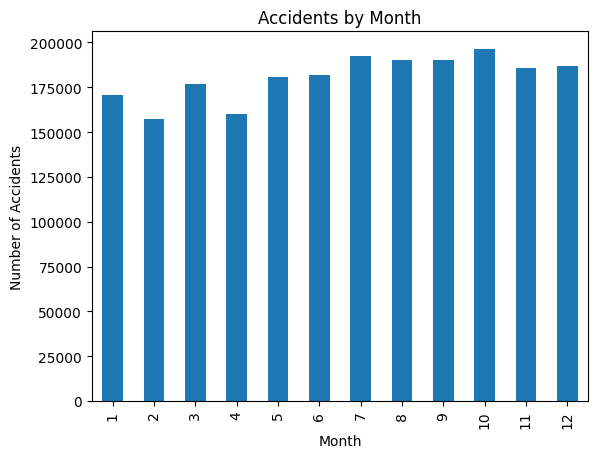

In [38]:
df['MONTH'] = df['CRASH_DATE'].dt.month
month_counts = df['MONTH'].value_counts().sort_index()
plt.figure()
month_counts.plot(kind='bar')
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


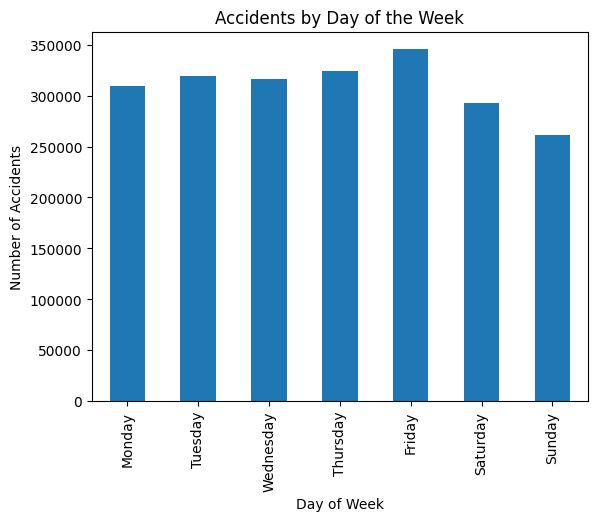

In [39]:
df['DAY_OF_WEEK'] = df['CRASH_DATE'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['DAY_OF_WEEK'].value_counts().reindex(day_order)
plt.figure()
day_counts.plot(kind='bar')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.show()

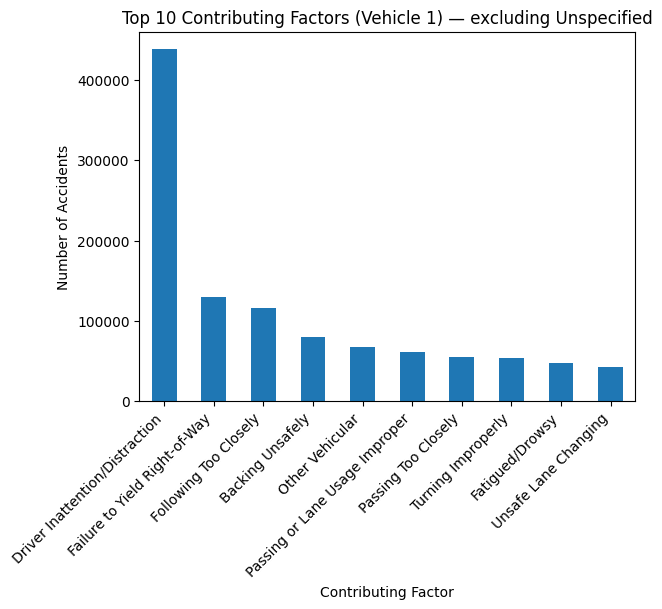

In [41]:
causes = df['CONTRIBUTING FACTOR VEHICLE 1']
causes = causes[~causes.isin(['Unspecified', 'None'])]

factor_counts = causes.value_counts().head(10)

plt.figure()
factor_counts.plot(kind='bar')
plt.title('Top 10 Contributing Factors (Vehicle 1) — excluding Unspecified')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()

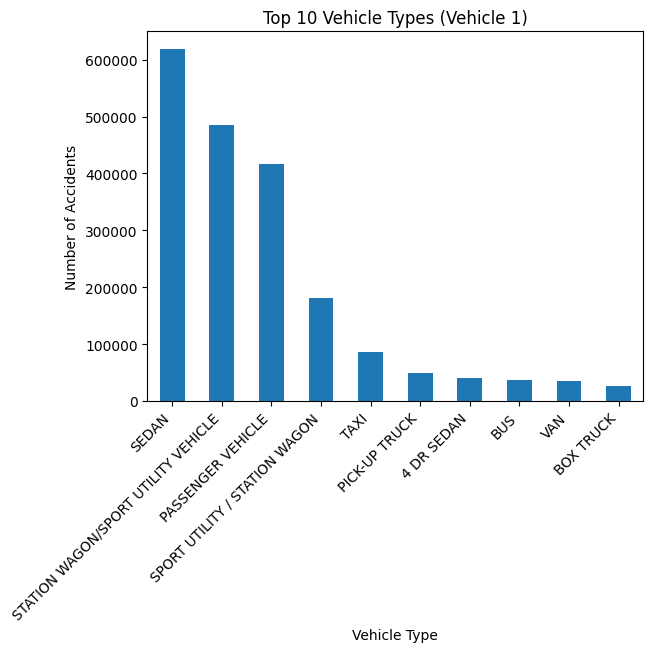

In [45]:
df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].fillna('None')

vehicle_counts = df['VEHICLE TYPE CODE 1'].value_counts().head(10)

plt.figure()
vehicle_counts.plot(kind='bar')
plt.title('Top 10 Vehicle Types (Vehicle 1)')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()


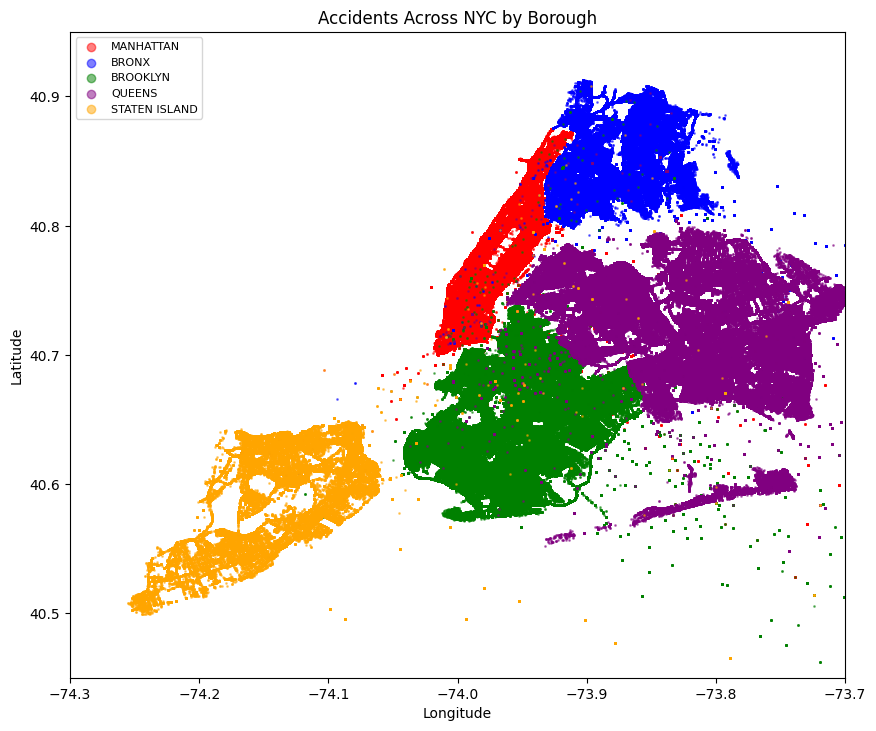

In [56]:
borough_colors = {
    'MANHATTAN': 'red',
    'BRONX': 'blue',
    'BROOKLYN': 'green',
    'QUEENS': 'purple',
    'STATEN ISLAND': 'orange'
}

df_valid = df.dropna(subset=['LATITUDE', 'LONGITUDE'])

plt.figure(figsize=(10, 12))

for borough, color in borough_colors.items():
    borough_df = df_valid[df_valid['BOROUGH'] == borough]
    plt.scatter(
        borough_df['LONGITUDE'], 
        borough_df['LATITUDE'], 
        color=color, 
        label=borough,
        s=1,
        alpha=0.5
    )

plt.title('Accidents Across NYC by Borough')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim([-74.3, -73.7])
plt.ylim([40.45, 40.95])
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(markerscale=6, fontsize=8)
plt.show()
